In [52]:
import pandas as pd

df = pd.read_csv('/Users/ml/Desktop/ViewingActivity.csv')
df.shape

(200, 10)

In [53]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)


In [54]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Start Time,Duration,Title,Device Type
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...,Mac


In [55]:
df.dtypes

Start Time     object
Duration       object
Title          object
Device Type    object
dtype: object

In [56]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time     datetime64[ns, UTC]
Duration                    object
Title                       object
Device Type                 object
dtype: object

In [57]:
df = df.set_index('Start Time')

df.index = df.index.tz_convert('US/Eastern')

df = df.reset_index()

df.head(1)

,Start Time,Duration,Title,Device Type
0,2013-03-20 01:17:53-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...,Mac


In [58]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time     datetime64[ns, US/Eastern]
Duration                  timedelta64[ns]
Title                              object
Device Type                        object
dtype: object

In [59]:
startrek = df[df['Title'].str.contains('Star Trek: Deep Space Nine', regex=False)]

In [60]:
startrek.shape

(43, 4)

In [61]:
startrek = startrek[(startrek['Duration'] > '0 days 00:01:00')]
startrek.shape

(38, 4)

In [62]:
startrek['Duration'].sum()

Timedelta('0 days 20:00:57')

In [63]:
startrek['Duration'].mean()

Timedelta('0 days 00:31:36.236842105')

In [64]:
startrek['weekday'] = startrek['Start Time'].dt.weekday
startrek['hour'] = startrek['Start Time'].dt.hour

startrek.head(1)

,Start Time,Duration,Title,Device Type,weekday,hour
1,2013-03-20 00:27:45-04:00,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...,Mac,2,0


In [65]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'DS9 Episodes Watched by Day'}>

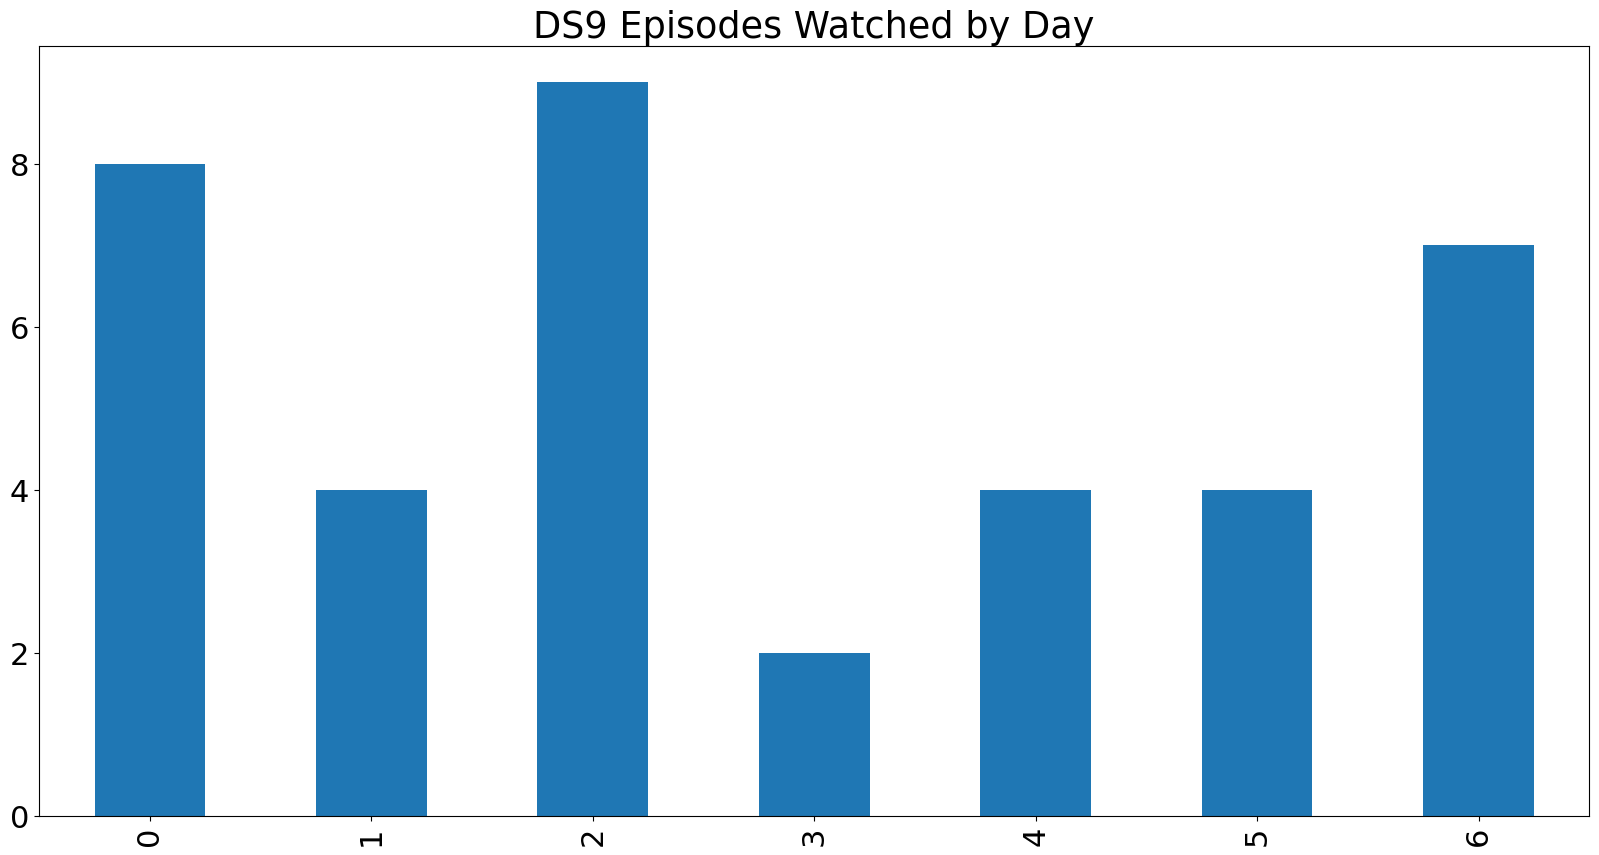

In [66]:
startrek['weekday'] = pd.Categorical(startrek['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

startrek_by_day = startrek['weekday'].value_counts()

startrek_by_day = startrek_by_day.sort_index()

matplotlib.rcParams.update({'font.size': 22})

startrek_by_day.plot(kind='bar', figsize=(20,10), title='DS9 Episodes Watched by Day')

<AxesSubplot:title={'center':'DS9 Episodes Watched by Hour'}>

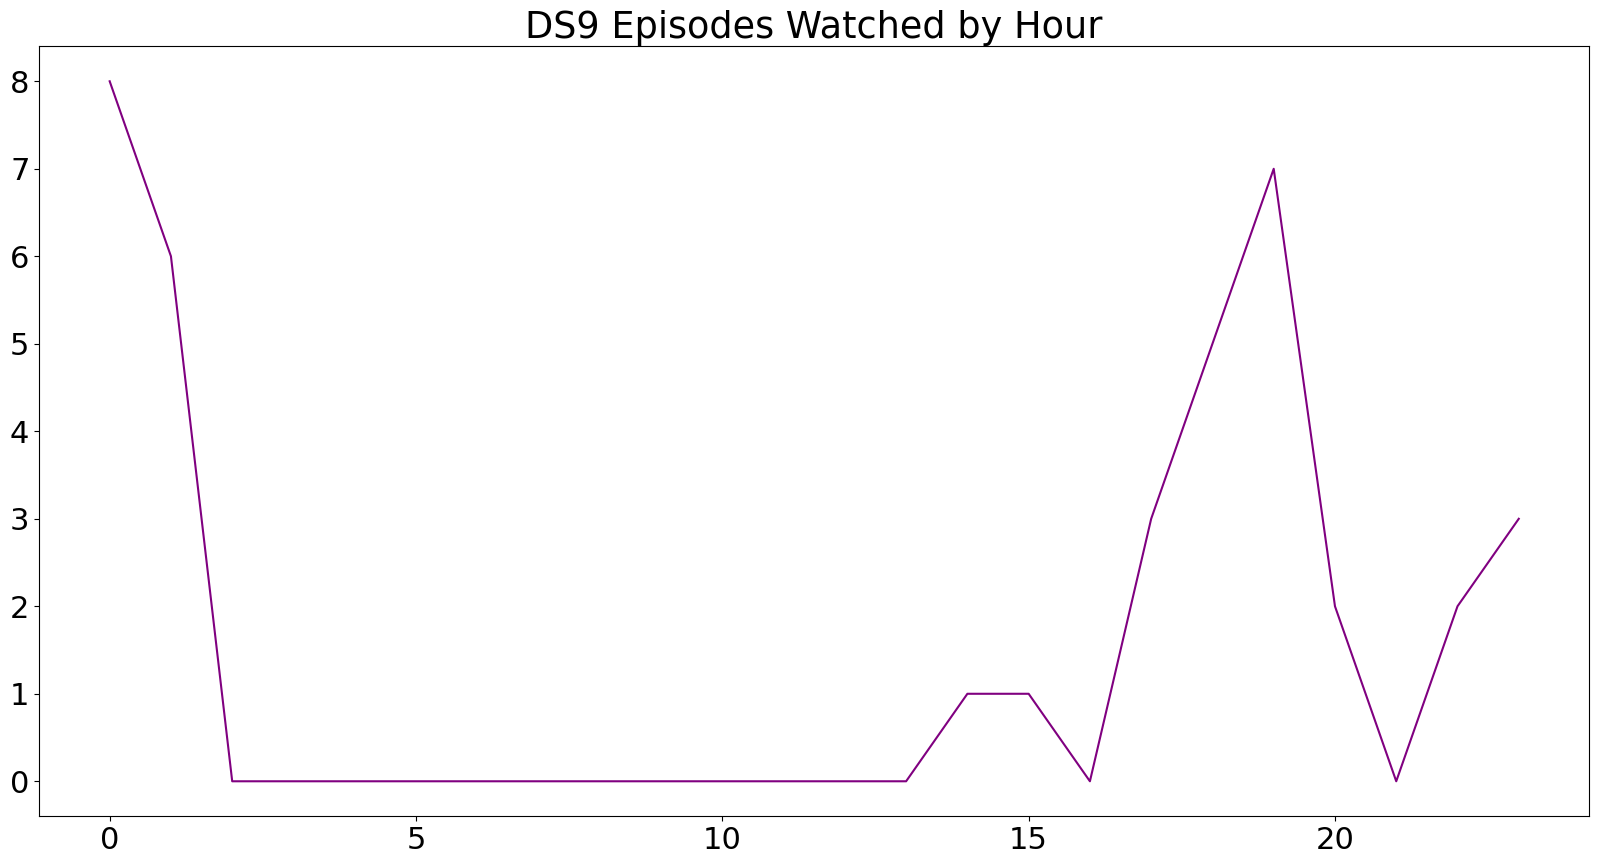

In [67]:
startrek['hour'] = pd.Categorical(startrek['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

startrek_by_hour = startrek['hour'].value_counts()

startrek_by_hour = startrek_by_hour.sort_index()

startrek_by_hour.plot(kind='line', color = 'purple', figsize=(20,10), title='DS9 Episodes Watched by Hour')

/Users/ml/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

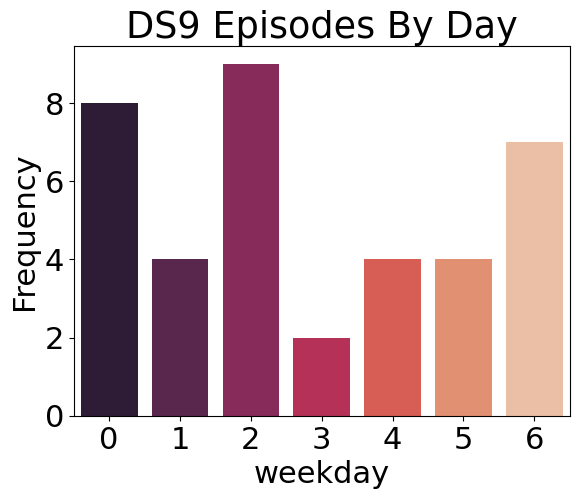

In [68]:
import seaborn as sns
palette = sns.color_palette("rocket", as_cmap=True)
ax = sns.countplot(startrek['weekday'], label='Count', palette='rocket')
ax.set_title('DS9 Episodes By Day')
ax.set_ylabel('Frequency')

<AxesSubplot:title={'center':'DS9 Episodes Watched by Hour'}, ylabel='hour'>

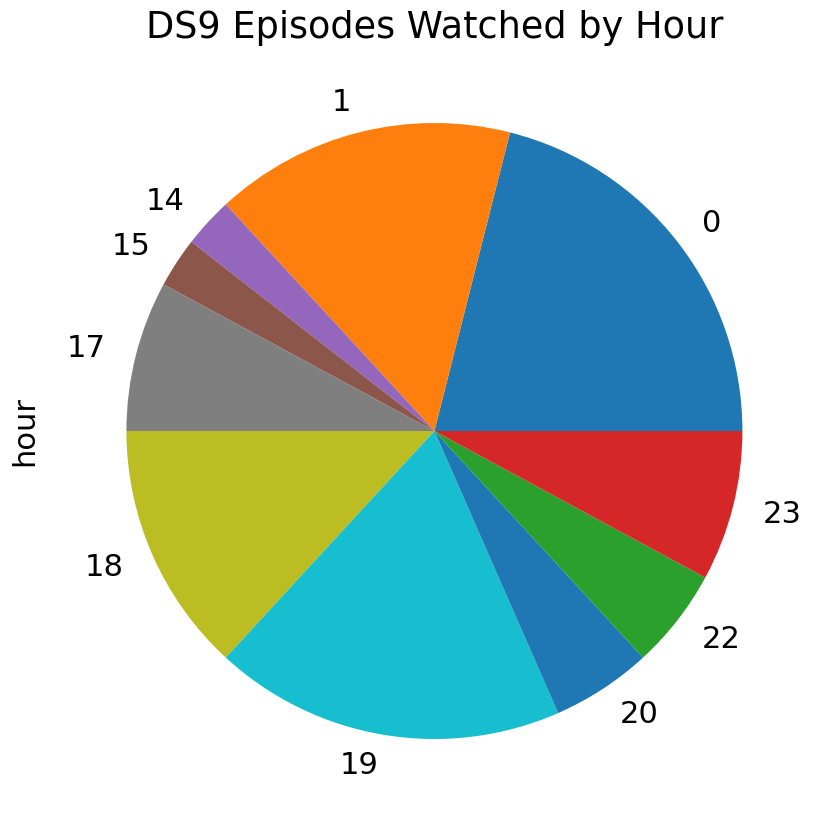

In [69]:
startrek['hour'] = pd.Categorical(startrek['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

startrek_by_hour = startrek['hour'].value_counts()

startrek_by_hour = startrek_by_hour.sort_index()

startrek_by_hour.plot(kind='pie', figsize=(20,10), title='DS9 Episodes Watched by Hour')

In [70]:
startrek_by_day = startrek['Device Type'].value_counts()

startrek_by_day = startrek_by_day.sort_index()
print(startrek_by_day)

Mac                   36
Microsoft Xbox 360     2
Name: Device Type, dtype: int64


/Users/ml/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Viewings')

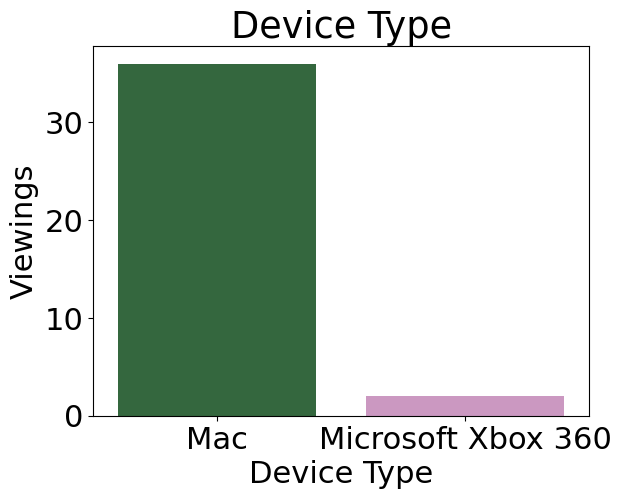

In [71]:
sns.color_palette("cubehelix", as_cmap=True)
ax = sns.countplot(startrek['Device Type'], label='Count', palette='cubehelix')
ax.set_title('Device Type')
ax.set_ylabel('Viewings')